#### Описание данных:
 <ul>
    <li><strong>"year"</strong> - year (1990-2017)</li>
<li><strong>"region"</strong> - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast</li>
<li><strong>"npg"</strong> - natural population growth by 1000 people. Calculating as the difference between birth rate and death rate</li>
<li><strong>"birth_rate"</strong> - number of births by 1000 people</li>
<li><strong>"death_rate"</strong> - number of deaths by 1000 people</li>
<li><strong>"gdw"</strong> - general demographic weight (how many people of non-woking age account for 100 people of working age). Working age for men 16-60 years, for women 16-55 years</li>
<li><strong>"urbanization"</strong> - % of urban population</li>
    </ul>
    Источник <a href='https://www.kaggle.com/datasets/dwdkills/russian-demography'>Russian Demography Data (1990-2017)</a>

In [310]:
import pandas as pd
import numpy as np
import scipy.stats
df=pd.read_csv('/Users/kamilayuldasheva/Downloads/russian_demography.csv',sep=',')
df

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2380 non-null   int64  
 1   region        2380 non-null   object 
 2   npg           2317 non-null   float64
 3   birth_rate    2317 non-null   float64
 4   death_rate    2315 non-null   float64
 5   gdw           2330 non-null   float64
 6   urbanization  2330 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 130.3+ KB


Анализ показал что у нас есть данные 5 колонок с данными типа flot64 - переменные с плавающими значениями; одна колонка с данными типа int64 - это данные с целами числами, в нашем случае это года. Также есть данные которые прогромма воспинирает как строку (object). Видим, что в данных есть пропущенные значения. 

In [312]:
df.isna().sum()

year             0
region           0
npg             63
birth_rate      63
death_rate      65
gdw             50
urbanization    50
dtype: int64

In [313]:
df.dropna()

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [314]:
df=df.dropna()

Отчистили датасет от строк с пропущенными значениями - 65 строк. Мы решили именно удалить а не подставить так как строк с пропущенными значениями немного и их удаление не повлияет на результаты нашего датасета. Далее переименуем колонки:

In [315]:
df.rename(columns = {'npg': 'natural population growth', 'gdw': 'unemployment rate'}, inplace=True)

/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_2988/468038067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'npg': 'natural population growth', 'gdw': 'unemployment rate'}, inplace=True)


In [316]:
df

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


### Уровень рождаемости и урбанизации

#### H0: В генеральной совокупности не существует зависимости между уровнем рождаемости и урбанизацией.

#### H1: В генеральной совокупности существует зависимость между уровнем рождаемости и урбанизацией.

Создадим новую бинарную переменную level of birth rate - уровень рождаемости для последующего анализа

In [317]:
def get_binary(bin):
    if bin >= 15:
        return 1
    else:
        return 0
df['birth_rate'].apply(get_binary) 
df['level of birth_rate'] = df['birth_rate'].apply(get_binary) 


/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_2988/3294814853.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level of birth_rate'] = df['birth_rate'].apply(get_binary)


Проверим, получилось ли изменить

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2315 entries, 0 to 2379
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       2315 non-null   int64  
 1   region                     2315 non-null   object 
 2   natural population growth  2315 non-null   float64
 3   birth_rate                 2315 non-null   float64
 4   death_rate                 2315 non-null   float64
 5   unemployment rate          2315 non-null   float64
 6   urbanization               2315 non-null   float64
 7   level of birth_rate        2315 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 162.8+ KB


Создадим еще одну переменную level of urbanization -  уровень урбанизации

In [319]:
df

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization,level of birth_rate
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42,0
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07,0
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37,1
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63,0
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01,1
...,...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00,0
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00,0
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50,0
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70,0


In [320]:
def get__urbanization(urb):
    if urb >= 70:
        return 1
    else:
        return 0

In [321]:
df['urbanization'].apply(get__urbanization) 
df['level of urbanization'] = df['urbanization'].apply(get__urbanization) 
df['level of urbanization'] = pd.Categorical(df['level of urbanization'])

/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_2988/259443583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level of urbanization'] = df['urbanization'].apply(get__urbanization)
/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_2988/259443583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level of urbanization'] = pd.Categorical(df['level of urbanization'])


In [322]:
df

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization,level of birth_rate,level of urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42,0,0
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07,0,0
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37,1,0
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63,0,1
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01,1,0
...,...,...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00,0,0
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00,0,1
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50,0,0
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70,0,1


Построим таблицу сопряженности

In [323]:
ct_o=df.groupby('level of birth_rate')['level of urbanization'].value_counts().unstack()
ct_o

,0,1
level of birth_rate,,
0,969,1092
1,214,40


In [324]:
scipy.stats.chi2_contingency(ct_o, correction=False)

(125.47481649510533,
 4.0064225597525893e-29,
 1,
 array([[1053.20215983, 1007.79784017],
        [ 129.79784017,  124.20215983]]))

В данном случае, степень свободы равна 1 и альфа =0,01 => критическое значение = 6,63490. Наш критерий больше критического значения, следовательно мы можем опровергнуть нулевую гипотезу

### Рождаемость 2017 год и 1990 год

#### H0: Средний уровень рождаемости не равен среднему уровню смерти в 2017 и в 1990

#### H1: Средний уровень рождаемости равен среднему уровню смерти в 2017 и в 1990


In [325]:
df_1= df[(df['year'] ==2017)|(df['year'] ==1990)]
df_1

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization,level of birth_rate,level of urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42,0,0
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07,0,0
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37,1,0
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63,0,1
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01,1,0
...,...,...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00,0,0
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00,0,1
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50,0,0
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70,0,1


In [326]:
df_2=pd.pivot_table(df_1,
               index=['year','region'])
df_2

birth_rate  death_rate  \
year region                                                   
1990 Altai Krai                            12.9        11.1   
     Altai Republic                        19.3        10.9   
     Amur Oblast                           16.2         8.6   
     Arkhangelsk Oblast                    13.5         9.8   
     Astrakhan Oblast                      15.1        10.4   
...                                         ...         ...   
2017 Vologda Oblast                        11.4        14.4   
     Voronezh Oblast                        9.6        14.6   
     Yamalo-Nenets Autonomous Okrug        14.0         4.9   
     Yaroslavl Oblast                      10.5        15.2   
     Zabaykalsky Krai                      13.4        11.7   

                                     level of birth_rate  \
year region                                                
1990 Altai Krai                                        0   
     Altai Republic                                    1   
     Amur Oblast                                       1   
     Arkhangelsk Oblast                                0   
     Astrakhan Oblast                                  1   
...                                                  ...   
2017 Vologda Oblast                                    0   
     Voronezh Oblast                                   0   
     Yamalo-Nenets Autonomous Okrug                    0   
     Yaroslavl Oblast                                  0   
     Zabaykalsky Krai                                  0   

                                     natural population growth  \
year region                                                      
1990 Altai Krai                                            1.8   
     Altai Republic                                        8.4   
     Amur Oblast                                           7.6   
     Arkhangelsk Oblast                                    3.7   
     Astrakhan Oblast                                      4.7   
...                                                        ...   
2017 Vologda Oblast                                       -3.0   
     Voronezh Oblast                                      -5.0   
     Yamalo-Nenets Autonomous Okrug                        9.1   
     Yaroslavl Oblast                                     -4.7   
     Zabaykalsky Krai                                      1.7   

                                     unemployment rate  urbanization  
year region                                                           
1990 Altai Krai                                  80.24         58.07  
     Altai Republic                              90.07         27.17  
     Amur Oblast                                 69.55         68.37  
     Arkhangelsk Oblast                          73.26         73.63  
     Astrakhan Oblast                            77.05         68.01  
...                                                ...           ...  
2017 Vologda Oblast                              81.85         72.20  
     Voronezh Oblast                             78.28         67.30  
     Yamalo-Nenets Autonomous Okrug              53.57         83.70  
     Yaroslavl Oblast                            82.61         81.70  
     Zabaykalsky Krai                            74.70         68.00  

[167 rows x 6 columns]

Проверим, соотвествуют ли наши данные нормальному распределению

<AxesSubplot:>

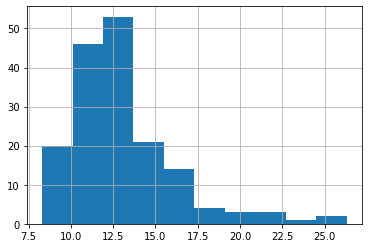

In [327]:
df_2['birth_rate'].hist()

Видим, что распределение ненормальное. Используем логорифм

<AxesSubplot:>

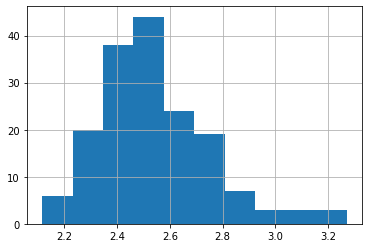

In [328]:
df_2['log_birth_rate']=np.log(df_2['birth_rate'])
df_2['log_birth_rate'].hist()


Оно стало более нормальным

<AxesSubplot:>

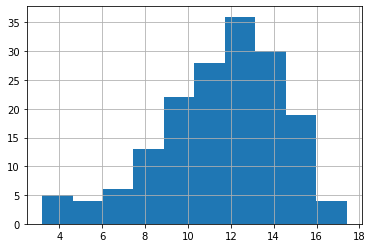

In [329]:
df_2['death_rate'].hist()

In [330]:
df_2

birth_rate  death_rate  \
year region                                                   
1990 Altai Krai                            12.9        11.1   
     Altai Republic                        19.3        10.9   
     Amur Oblast                           16.2         8.6   
     Arkhangelsk Oblast                    13.5         9.8   
     Astrakhan Oblast                      15.1        10.4   
...                                         ...         ...   
2017 Vologda Oblast                        11.4        14.4   
     Voronezh Oblast                        9.6        14.6   
     Yamalo-Nenets Autonomous Okrug        14.0         4.9   
     Yaroslavl Oblast                      10.5        15.2   
     Zabaykalsky Krai                      13.4        11.7   

                                     level of birth_rate  \
year region                                                
1990 Altai Krai                                        0   
     Altai Republic                                    1   
     Amur Oblast                                       1   
     Arkhangelsk Oblast                                0   
     Astrakhan Oblast                                  1   
...                                                  ...   
2017 Vologda Oblast                                    0   
     Voronezh Oblast                                   0   
     Yamalo-Nenets Autonomous Okrug                    0   
     Yaroslavl Oblast                                  0   
     Zabaykalsky Krai                                  0   

                                     natural population growth  \
year region                                                      
1990 Altai Krai                                            1.8   
     Altai Republic                                        8.4   
     Amur Oblast                                           7.6   
     Arkhangelsk Oblast                                    3.7   
     Astrakhan Oblast                                      4.7   
...                                                        ...   
2017 Vologda Oblast                                       -3.0   
     Voronezh Oblast                                      -5.0   
     Yamalo-Nenets Autonomous Okrug                        9.1   
     Yaroslavl Oblast                                     -4.7   
     Zabaykalsky Krai                                      1.7   

                                     unemployment rate  urbanization  \
year region                                                            
1990 Altai Krai                                  80.24         58.07   
     Altai Republic                              90.07         27.17   
     Amur Oblast                                 69.55         68.37   
     Arkhangelsk Oblast                          73.26         73.63   
     Astrakhan Oblast                            77.05         68.01   
...                                                ...           ...   
2017 Vologda Oblast                              81.85         72.20   
     Voronezh Oblast                             78.28         67.30   
     Yamalo-Nenets Autonomous Okrug              53.57         83.70   
     Yaroslavl Oblast                            82.61         81.70   
     Zabaykalsky Krai                            74.70         68.00   

                                     log_birth_rate  
year region                                          
1990 Altai Krai                            2.557227  
     Altai Republic                        2.960105  
     Amur Oblast                           2.785011  
     Arkhangelsk Oblast                    2.602690  
     Astrakhan Oblast                      2.714695  
...                                             ...  
2017 Vologda Oblast                        2.433613  
     Voronezh Oblast                       2.261763  
     Yamalo-Nenets Autonomous Okrug        2.639057  
     Yaroslavl Oblast                      2.3

In [331]:
print(df_2['death_rate'].var())
print(df_2['log_birth_rate'].var())

8.382043142630401
0.04579649640172098


In [332]:
scipy.stats.ttest_ind(df_2['death_rate'],df_2['log_birth_rate'], equal_var=False)

Ttest_indResult(statistic=40.0656837641687, pvalue=7.906723102790317e-88)

Найдем критическое значение

In [333]:
n_1 = len (df_2['death_rate'])
n_2 = len (df_2['log_birth_rate'])
var_1 = df_2['death_rate'].var()
var_2 = df_2['log_birth_rate'].var()


In [334]:
V_1 = var_1 / n_1
V_2 = var_2 / n_2
dof_welch = (V_1 + V_2)**2/(V_1**2/(n_1 - 1) + V_2**2/ (n_2-1))
print (int(dof_welch))

167


при альфа 0,05 критическое значение = 1,9742710 => гипотеза H0 опровергается

### Уровень безработицы

Cоздадим новую переменную level of unemployment для анализа 

In [335]:
df['unemployment rate'].min()

37.5

In [336]:
df['unemployment rate'].max()

95.05

In [337]:
def get__unemployment_rate(um):
    if um < 60:
        return 0
    else:
        return 1

In [338]:
df['unemployment rate'].apply(get__unemployment_rate) 
df['level of unemployment'] = df['unemployment rate'].apply(get__unemployment_rate) 

/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_2988/877468380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level of unemployment'] = df['unemployment rate'].apply(get__unemployment_rate)


In [339]:
df

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization,level of birth_rate,level of urbanization,level of unemployment
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42,0,0,1
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07,0,0,1
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37,1,0,1
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63,0,1,1
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00,0,0,1
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00,0,1,0
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50,0,0,1
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70,0,1,0


In [340]:
import statsmodels.api as sm

In [341]:
x = sm.add_constant (df ['level of urbanization'])
y = df ['level of unemployment' ]
logit = sm. Logit (y, x)
results =logit.fit()
print (results.summary ( ))

Optimization terminated successfully.
         Current function value: 0.499912
         Iterations 6
                             Logit Regression Results                            
Dep. Variable:     level of unemployment   No. Observations:                 2315
Model:                             Logit   Df Residuals:                     2313
Method:                              MLE   Df Model:                            1
Date:                   Wed, 14 Dec 2022   Pseudo R-squ.:                 0.03674
Time:                           23:34:23   Log-Likelihood:                -1157.3
converged:                          True   LL-Null:                       -1201.4
Covariance Type:               nonrobust   LLR p-value:                 5.700e-21
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.8481      0.085     21.796      0.

Так как P>|z| = 0 то можно сказать что коэффиценты значимые 

In [342]:
np.exp( -0.9771)

0.37640108074792306

Тут можно сказать что при высоком уровне урбанизации вероятность того что уровень безработицы будет высоким в 1 к 3

In [343]:
np.exp(  1.8481  )

6.347747337716245

Здесь мы посмотрели вероятность наступления события если уровень урбанизации низкий => вероятность высокой безработицы 6 к 1

## Уровень смертности

Предпосылки к построении линейной регрессии 

In [344]:
df_3=df.drop(['level of birth_rate','natural population growth','level of unemployment','region','year','level of urbanization'], axis=1)

In [345]:
df_3

,birth_rate,death_rate,unemployment rate,urbanization
0,14.2,12.3,84.66,52.42
1,12.9,11.1,80.24,58.07
2,16.2,8.6,69.55,68.37
3,13.5,9.8,73.26,73.63
4,15.1,10.4,77.05,68.01
...,...,...,...,...
2375,11.3,12.6,76.63,62.00
2376,13.1,9.4,58.23,70.00
2377,14.5,8.1,70.10,65.50
2378,14.0,4.9,53.57,83.70


In [346]:
import matplotlib.pyplot as plt
import seaborn as sns

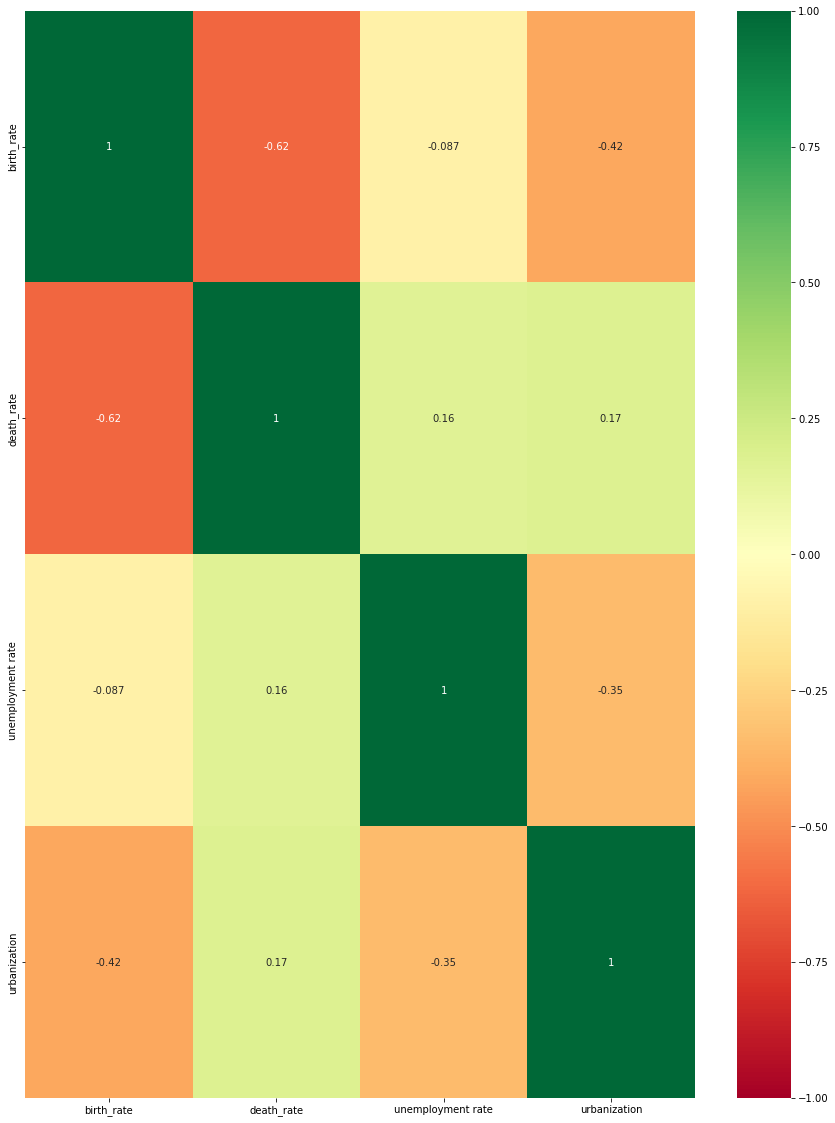

In [347]:
plt.figure (figsize= (15,20))
p=sns.heatmap(df_3.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

Здесь мы можем сделать вывод что данные подходят, так как корреляция несильная следовательно переменные независимые

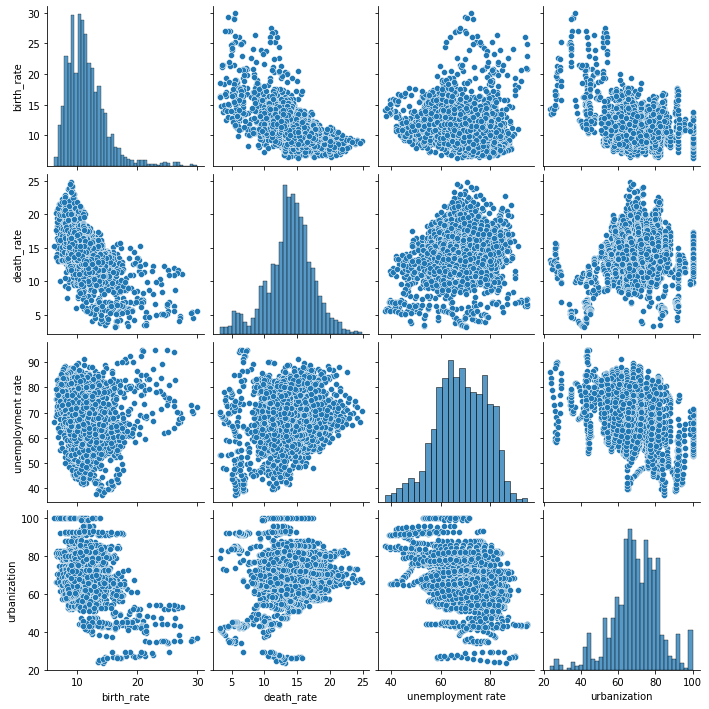

In [348]:
sns.pairplot(df_3)

 => делаем вывод, что мы можем построить линейную регрессию

In [349]:
x = df_3['birth_rate']
y = df_3 ['death_rate']
X_constant = sm.add_constant(x)
model = sm.OLS (y, X_constant)
res_simple = model.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     1430.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          5.12e-244
Time:                        23:34:29   Log-Likelihood:                -5627.1
No. Observations:                2315   AIC:                         1.126e+04
Df Residuals:                    2313   BIC:                         1.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.6242      0.212    101.952      0.0

Наша модель описывает только 38% выборки. В след. моделе попробуем описать полученные коэффиценты.

In [350]:
x_mult=df_3.drop('death_rate', axis=1)
x_mult

,birth_rate,unemployment rate,urbanization
0,14.2,84.66,52.42
1,12.9,80.24,58.07
2,16.2,69.55,68.37
3,13.5,73.26,73.63
4,15.1,77.05,68.01
...,...,...,...
2375,11.3,76.63,62.00
2376,13.1,58.23,70.00
2377,14.5,70.10,65.50
2378,14.0,53.57,83.70


In [351]:
x_mult = sm.add_constant(df_3.drop('death_rate', axis=1))
model = sm.OLS(y, x_mult)
res_mult = model.fit ()
print (res_mult.summary ())

                            OLS Regression Results                            
Dep. Variable:             death_rate   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     505.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.16e-252
Time:                        23:34:30   Log-Likelihood:                -5599.8
No. Observations:                2315   AIC:                         1.121e+04
Df Residuals:                    2311   BIC:                         1.123e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                21.2621      0.78

Введение новых переменных показало не сильно улучшило модель было: R-squared: 0.382, а стало  0.382
Также мы можем сказать что чем выше уровень рождаемости, тем меньше уровень смертности. В остальных случах коэффиценты незначительные, поэтому делать такие выводы нет смысла